Nama : Robertus<br>
Domisili : Tana Toraja, Sulawesi Selatan<br>
No. HP/WA : 082290009830<br>
Alamat Email : robertus988@gmail.com

In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissor.zip

--2020-10-30 04:26:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissor.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.0MB/s    in 35s     

2020-10-30 04:26:55 (8.91 MB/s) - ‘/tmp/rockpaperscissor.zip’ saved [322873683/322873683]



In [2]:
# eksrak file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# split dataset
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

In [4]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')
val_rock = os.path.join(validation_dir, 'rock')
val_scissors = os.path.join(validation_dir, 'scissors')
val_paper = os.path.join(validation_dir, 'paper')

In [6]:
os.mkdir(train_rock)
os.mkdir(train_scissors)
os.mkdir(train_paper)
os.mkdir(val_rock)
os.mkdir(val_scissors)
os.mkdir(val_paper)

In [9]:
# data train dan data validasi
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [12]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock, file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(val_scissors, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper, file))

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')                                  
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [16]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2)

Epoch 1/20
25/25 - 26s - loss: 1.1933 - accuracy: 0.4137 - val_loss: 0.9688 - val_accuracy: 0.7125
Epoch 2/20
25/25 - 26s - loss: 0.8042 - accuracy: 0.6762 - val_loss: 0.7825 - val_accuracy: 0.6687
Epoch 3/20
25/25 - 26s - loss: 0.6174 - accuracy: 0.7563 - val_loss: 0.6091 - val_accuracy: 0.7250
Epoch 4/20
25/25 - 26s - loss: 0.4471 - accuracy: 0.8275 - val_loss: 0.4005 - val_accuracy: 0.8313
Epoch 5/20
25/25 - 26s - loss: 0.3255 - accuracy: 0.8712 - val_loss: 0.2569 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 26s - loss: 0.2744 - accuracy: 0.8950 - val_loss: 0.3048 - val_accuracy: 0.8875
Epoch 7/20
25/25 - 26s - loss: 0.2525 - accuracy: 0.8925 - val_loss: 0.4446 - val_accuracy: 0.8188
Epoch 8/20
25/25 - 26s - loss: 0.2472 - accuracy: 0.9125 - val_loss: 0.2563 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 26s - loss: 0.1606 - accuracy: 0.9475 - val_loss: 0.1672 - val_accuracy: 0.9250
Epoch 10/20
25/25 - 26s - loss: 0.1296 - accuracy: 0.9550 - val_loss: 0.1644 - val_accuracy: 0.9375
Epoch 11/

Saving beb656e8-37a1-41c5-bac0-ed030e59cd4b.png to beb656e8-37a1-41c5-bac0-ed030e59cd4b (3).png
beb656e8-37a1-41c5-bac0-ed030e59cd4b.png
0.0
0.0
1.0
Scissors


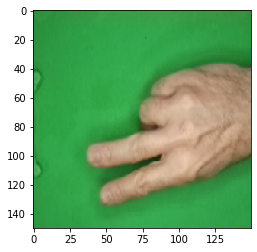

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes[0,0])
  print(classes[0,1])
  print(classes[0,2])

  if classes[0,0] == 1:
    print('Paper')
  elif classes[0,1] == 1:
    print('Rock')
  elif classes[0,2] == 1:
    print('Scissors')
  
